Missing Values:
CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64 

ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64 

TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64 



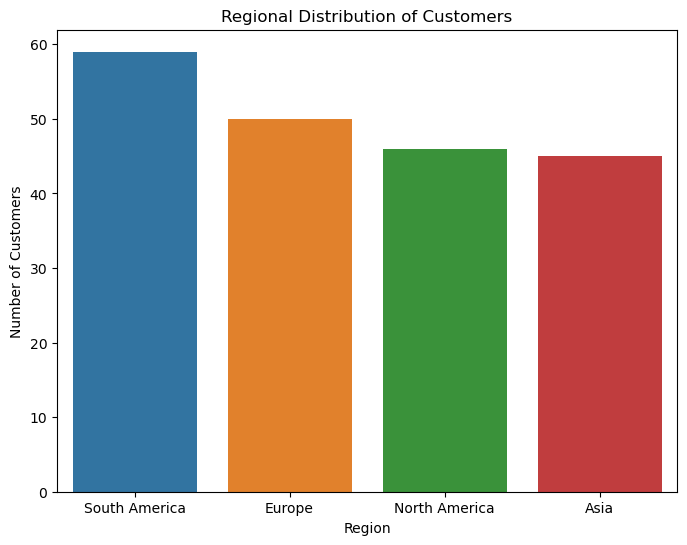

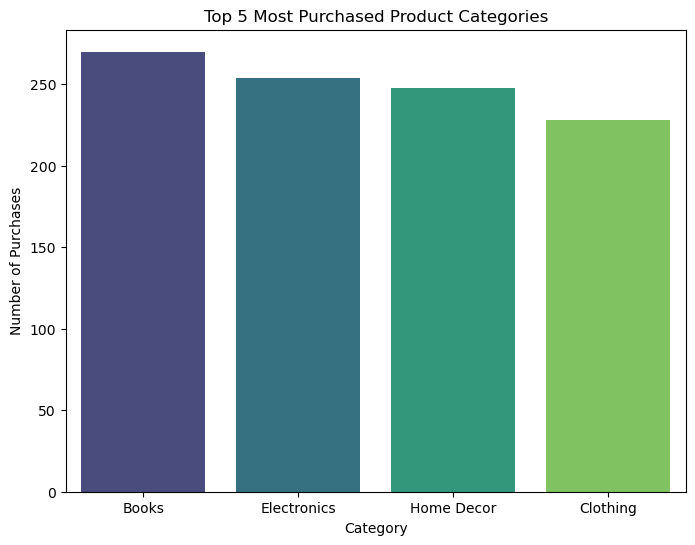

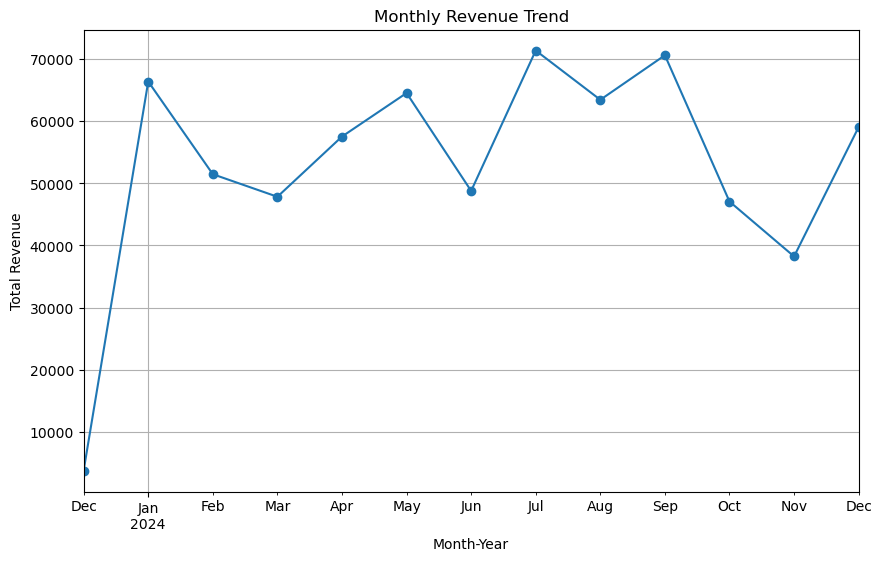

Average Customer Spend: $3467.31
Top 10 High Revenue Products:
ProductName
ActiveWear Smartwatch      39096.97
SoundWave Headphones       25211.64
SoundWave Novel            24507.90
ActiveWear Jacket          22712.56
ActiveWear Rug             22314.43
TechPro Headphones         19513.80
BookWorld Cookbook         19221.99
BookWorld Sweater          18743.79
TechPro Textbook           18267.96
ActiveWear Cookware Set    18083.73
Name: TotalValue, dtype: float64


In [3]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the datasets
customers = pd.read_csv("C:/Users/madhu/Downloads/Customers.csv")
products = pd.read_csv("C:/Users/madhu/Downloads/Products.csv")
transactions = pd.read_csv("C:/Users/madhu/Downloads/Transactions.csv")

# Check for missing values
print("Missing Values:")
print(customers.isnull().sum(), "\n")
print(products.isnull().sum(), "\n")
print(transactions.isnull().sum(), "\n")

# Merge datasets for better analysis
merged_data = transactions.merge(customers, on="CustomerID").merge(products, on="ProductID")

# EDA Examples
# 1. Regional Distribution of Customers
region_counts = customers["Region"].value_counts()
plt.figure(figsize=(8, 6))
sns.barplot(x=region_counts.index, y=region_counts.values)
plt.title("Regional Distribution of Customers")
plt.xlabel("Region")
plt.ylabel("Number of Customers")
plt.show()

# 2. Top 5 Most Purchased Product Categories
top_categories = merged_data["Category"].value_counts().head(5)
plt.figure(figsize=(8, 6))
sns.barplot(x=top_categories.index, y=top_categories.values, palette="viridis")
plt.title("Top 5 Most Purchased Product Categories")
plt.xlabel("Category")
plt.ylabel("Number of Purchases")
plt.show()

# 3. Monthly Revenue Trend
merged_data["TransactionDate"] = pd.to_datetime(merged_data["TransactionDate"])
merged_data["MonthYear"] = merged_data["TransactionDate"].dt.to_period("M")
monthly_revenue = merged_data.groupby("MonthYear")["TotalValue"].sum()
monthly_revenue.plot(kind="line", figsize=(10, 6), marker="o")
plt.title("Monthly Revenue Trend")
plt.xlabel("Month-Year")
plt.ylabel("Total Revenue")
plt.grid()
plt.show()

# 4. Average Customer Spend
avg_spend = merged_data.groupby("CustomerID")["TotalValue"].sum().mean()
print(f"Average Customer Spend: ${avg_spend:.2f}")

# 5. High Revenue Products
high_revenue_products = (
    merged_data.groupby("ProductName")["TotalValue"].sum().sort_values(ascending=False).head(10)
)
print("Top 10 High Revenue Products:")
print(high_revenue_products)
